In [1]:
!git clone https://github.com/hungvotranchi/ComputerVision.git

Cloning into 'ComputerVision'...
remote: Enumerating objects: 84, done.
remote: Counting objects: 100% (84/84), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 84 (delta 27), reused 76 (delta 22), pack-reused 0
Unpacking objects: 100% (84/84), 4.36 MiB | 9.30 MiB/s, done.


In [2]:
import os
os.chdir("ComputerVision/ImageClassification")
os.chdir("model")

--2024-03-09 19:11:43--  https://www.robots.ox.ac.uk/~vgg/data/fgvc-aircraft/archives/fgvc-aircraft-2013b.tar.gz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2753340328 (2.6G) [application/x-gzip]
Saving to: 'fgvc-aircraft-2013b.tar.gz'

fgvc-aircraft-2013b 100%[===================>]   2.56G  25.0MB/s    in 1m 48s  

2024-03-09 19:13:31 (24.3 MB/s) - 'fgvc-aircraft-2013b.tar.gz' saved [2753340328/2753340328]

fgvc-aircraft-2013b/
fgvc-aircraft-2013b/vl_tpfp.m
fgvc-aircraft-2013b/README.md
fgvc-aircraft-2013b/example_evaluation.m
fgvc-aircraft-2013b/README.html
fgvc-aircraft-2013b/vl_roc.m
fgvc-aircraft-2013b/vl_pr.m
fgvc-aircraft-2013b/vl_argparse.m
fgvc-aircraft-2013b/evaluation.m
fgvc-aircraft-2013b/data/
fgvc-aircraft-2013b/data/images_test.txt
fgvc-aircraft-2013b/data/images_train.txt
fgvc-aircraft-2013b/data/images_manu

In [3]:
import torch
import torchvision
import torch.optim as optim
import torch.nn as nn


import sys
sys.path.append("..")
from src.load_data import load_COCO, transform_CIFAR10
from src.plotting import imshow
from model.R_CNN import SimpleRCNN
from src.train_predict import train, test_classification

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [5]:
batch_size = 512

train_set, test_set = load_COCO(transform_CIFAR10())
train_dataloader = torch.utils.data.DataLoader(train_set, batch_size = batch_size, \
                                               shuffle = True, num_workers = 2)
test_dataloader = torch.utils.data.DataLoader(test_set, batch_size = batch_size, \
                                               shuffle = True, num_workers = 2)

In [6]:
classes = train_set.classes

In [7]:
classes

['707-320',
 '727-200',
 '737-200',
 '737-300',
 '737-400',
 '737-500',
 '737-600',
 '737-700',
 '737-800',
 '737-900',
 '747-100',
 '747-200',
 '747-300',
 '747-400',
 '757-200',
 '757-300',
 '767-200',
 '767-300',
 '767-400',
 '777-200',
 '777-300',
 'A300B4',
 'A310',
 'A318',
 'A319',
 'A320',
 'A321',
 'A330-200',
 'A330-300',
 'A340-200',
 'A340-300',
 'A340-500',
 'A340-600',
 'A380',
 'ATR-42',
 'ATR-72',
 'An-12',
 'BAE 146-200',
 'BAE 146-300',
 'BAE-125',
 'Beechcraft 1900',
 'Boeing 717',
 'C-130',
 'C-47',
 'CRJ-200',
 'CRJ-700',
 'CRJ-900',
 'Cessna 172',
 'Cessna 208',
 'Cessna 525',
 'Cessna 560',
 'Challenger 600',
 'DC-10',
 'DC-3',
 'DC-6',
 'DC-8',
 'DC-9-30',
 'DH-82',
 'DHC-1',
 'DHC-6',
 'DHC-8-100',
 'DHC-8-300',
 'DR-400',
 'Dornier 328',
 'E-170',
 'E-190',
 'E-195',
 'EMB-120',
 'ERJ 135',
 'ERJ 145',
 'Embraer Legacy 600',
 'Eurofighter Typhoon',
 'F-16A/B',
 'F/A-18',
 'Falcon 2000',
 'Falcon 900',
 'Fokker 100',
 'Fokker 50',
 'Fokker 70',
 'Global Express

Training

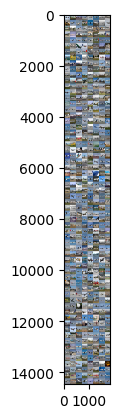

<generator object <genexpr> at 0x7c0f32bcb7d0>


In [8]:
dataiter = iter(train_dataloader)
img, labels = next(dataiter)

imshow(torchvision.utils.make_grid(img))
print(" ".join(f'{classes[labels[j]]}') for j in range(batch_size))


In [9]:
img.shape

torch.Size([512, 3, 224, 224])

In [10]:
model = AlexNet(num_class= len(classes))

model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [11]:
next(model.parameters()).is_cuda

True

In [13]:
train(num_loops= 20, criterion= criterion, optim= optimizer, model= model, \
      train_dataloader= train_dataloader, device= device, path = "AlexNet_fgcvAircraft.pth")

Finished Training


Testing

In [14]:
model_pred = AlexNet(num_class= len(classes))
model_pred.load_state_dict(torch.load("AlexNet_fgcvAircraft.pth"))

<All keys matched successfully>

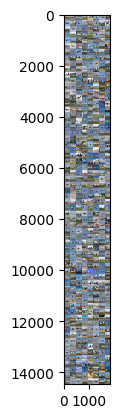

Ground truth:  DHC-1 777-200 747-300 ERJ 145 Beechcraft 1900 E-190 Eurofighter Typhoon Spitfire Yak-42 A340-500 A340-200 707-320 Eurofighter Typhoon A340-200 BAE-125 EMB-120 747-400 747-100 767-300 727-200 ATR-72 E-195 ATR-42 Dornier 328 Boeing 717 F-16A/B 737-500 Beechcraft 1900 737-500 A330-200 DC-8 E-195 747-400 747-100 BAE-125 Dornier 328 Saab 2000 MD-87 737-600 E-190 F-16A/B 747-100 747-200 Fokker 100 737-400 Cessna 208 757-300 A340-300 737-600 A380 C-47 Cessna 172 A300B4 A340-300 DHC-8-300 Fokker 70 Tu-134 Challenger 600 C-130 Fokker 100 Gulfstream V A340-300 ATR-42 737-300 DHC-1 DHC-8-300 737-500 BAE 146-200 727-200 DC-8 Falcon 2000 C-47 C-47 Gulfstream IV E-190 Saab 2000 DC-10 Falcon 2000 CRJ-700 PA-28 DHC-6 777-200 F/A-18 Saab 340 CRJ-900 A330-300 Falcon 2000 Cessna 525 EMB-120 EMB-120 A300B4 747-300 DH-82 A330-200 MD-87 DHC-1 A320 747-300 Tu-154 Fokker 100 DC-3 F-16A/B Metroliner F-16A/B A319 ERJ 145 A300B4 A321 A310 Challenger 600 Dornier 328 707-320 737-300 An-12 Tu-134 A38

In [15]:
dataiter = iter(test_dataloader)
img, labels = next(dataiter)
_, predicts = torch.max(model_pred(img), 1)


imshow(torchvision.utils.make_grid(img))
print("Ground truth: ", " ".join(f"{classes[labels[j]]}" for j in range(batch_size)))
print("Predict: ", " ".join(f"{classes[predicts[j]]}" for j in range(batch_size)))


In [16]:
test_classification(model= model_pred, test_dataloader= test_dataloader, \
                    device= device, classes= classes)

Accuracy of the network in the test dataset: 1 %
Accuracy for class 707-320: 0.0
Accuracy for class 727-200: 0.0
Accuracy for class 737-200: 0.0
Accuracy for class 737-300: 0.0
Accuracy for class 737-400: 0.0
Accuracy for class 737-500: 0.0
Accuracy for class 737-600: 0.0
Accuracy for class 737-700: 0.0
Accuracy for class 737-800: 0.0
Accuracy for class 737-900: 0.0
Accuracy for class 747-100: 0.0
Accuracy for class 747-200: 0.0
Accuracy for class 747-300: 0.0
Accuracy for class 747-400: 0.0
Accuracy for class 757-200: 0.0
Accuracy for class 757-300: 0.0
Accuracy for class 767-200: 0.0
Accuracy for class 767-300: 0.0
Accuracy for class 767-400: 0.0
Accuracy for class 777-200: 0.0
Accuracy for class 777-300: 0.0
Accuracy for class A300B4: 0.0
Accuracy for class A310: 0.0
Accuracy for class A318: 3.0303030303030303
Accuracy for class A319: 0.0
Accuracy for class A320: 0.0
Accuracy for class A321: 0.0
Accuracy for class A330-200: 0.0
Accuracy for class A330-300: 5.882352941176471
Accuracy

Loading from pretrained

In [17]:
from torchvision.models import alexnet,AlexNet_Weights

models_pretrained = alexnet(pretrained = True)

    
models_pretrained.classifier[6].out_features = len(classes)  # Get the number of input features of the first layer

# Check the modified model architecture
print(models_pretrained)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:02<00:00, 83.2MB/s] 


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [18]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(models_pretrained.parameters(), lr=0.001, momentum=0.9)

models_pretrained.to(device)

train(num_loops= 200, criterion= criterion, optim= optimizer, model= models_pretrained, \
      train_dataloader= train_dataloader, device= device, path = "AlexNet_fgcvAircraft.pth")

Finished Training


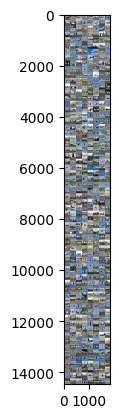

Ground truth:  DHC-1 757-300 EMB-120 Saab 340 MD-80 C-47 747-200 737-800 DC-10 A330-300 747-100 An-12 777-300 Eurofighter Typhoon E-195 767-200 Tu-134 BAE-125 A318 767-200 CRJ-200 747-300 777-200 Tu-154 Cessna 525 737-200 EMB-120 737-500 CRJ-700 757-300 DH-82 737-600 DR-400 DHC-8-300 Falcon 2000 Boeing 717 DC-9-30 Saab 2000 DHC-6 Falcon 2000 A340-500 BAE 146-200 A330-300 BAE 146-300 767-300 C-130 Tornado CRJ-900 ERJ 135 BAE 146-300 Cessna 525 Challenger 600 737-200 Tornado Challenger 600 A310 A340-300 767-300 ERJ 135 CRJ-900 737-600 CRJ-900 Falcon 900 BAE 146-200 Dornier 328 737-800 DC-6 Gulfstream IV 747-400 A319 C-47 BAE 146-200 737-900 F/A-18 MD-11 E-170 Boeing 717 727-200 Yak-42 MD-90 A380 CRJ-700 Spitfire A319 Gulfstream IV DC-6 Gulfstream V DHC-8-300 A380 A340-300 Cessna 208 PA-28 Falcon 900 Fokker 70 767-400 Metroliner DHC-8-100 ATR-42 DC-9-30 Beechcraft 1900 SR-20 MD-80 Gulfstream V 737-700 CRJ-900 737-800 Tornado E-190 Falcon 900 F/A-18 737-500 A380 BAE 146-200 MD-11 MD-90 CRJ

In [19]:
model_pred = models_pretrained
model_pred.load_state_dict(torch.load("AlexNet_fgcvAircraft.pth"))
dataiter = iter(test_dataloader)
img, labels = next(dataiter)
model_pred.to('cpu')
_, predicts = torch.max(model_pred(img), 1)


imshow(torchvision.utils.make_grid(img))
print("Ground truth: ", " ".join(f"{classes[labels[j]]}" for j in range(batch_size)))
print("Predict: ", " ".join(f"{classes[predicts[j]]}" for j in range(batch_size)))


In [20]:
model_pred.to(device)
test_classification(model= model_pred, test_dataloader= test_dataloader, \
                    device= device, classes= classes)

Accuracy of the network in the test dataset: 31 %
Accuracy for class 707-320: 27.272727272727273
Accuracy for class 727-200: 8.823529411764707
Accuracy for class 737-200: 21.21212121212121
Accuracy for class 737-300: 9.090909090909092
Accuracy for class 737-400: 14.705882352941176
Accuracy for class 737-500: 6.0606060606060606
Accuracy for class 737-600: 51.515151515151516
Accuracy for class 737-700: 23.529411764705884
Accuracy for class 737-800: 15.151515151515152
Accuracy for class 737-900: 24.242424242424242
Accuracy for class 747-100: 35.294117647058826
Accuracy for class 747-200: 6.0606060606060606
Accuracy for class 747-300: 18.181818181818183
Accuracy for class 747-400: 8.823529411764707
Accuracy for class 757-200: 12.121212121212121
Accuracy for class 757-300: 30.303030303030305
Accuracy for class 767-200: 20.58823529411765
Accuracy for class 767-300: 3.0303030303030303
Accuracy for class 767-400: 57.57575757575758
Accuracy for class 777-200: 8.823529411764707
Accuracy for clas